<a href="https://colab.research.google.com/github/surabhipandey18/Optimizers/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adagrad, RMSprop, SGD
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#load dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train/225.0 , x_test/225.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


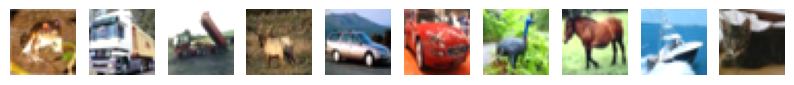

In [4]:
#show some images
plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()

In [5]:
#model building
def build_model(optimizer):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPool2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPool2D((2 ,2)),
        layers.Conv2D(64, (2, 2), activation='relu'),

        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [6]:
optimizers = ['SGD', 'Adagrad', 'Adam', 'RMSprop']
histories = {}

In [7]:
for opt in optimizers:
    print(f"\n training with {opt} optimizer")
    with tf.device('/GPU:0'):
      model = build_model(opt)
      history = model.fit(x_train, y_train, epochs= 5, batch_size= 16, validation_split = 0.1, verbose= 1)
      histories[opt] = history


 training with SGD optimizer


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.2212 - loss: 2.1063 - val_accuracy: 0.3696 - val_loss: 1.7384
Epoch 2/5
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4290 - loss: 1.5929 - val_accuracy: 0.4864 - val_loss: 1.4279
Epoch 3/5
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5032 - loss: 1.3953 - val_accuracy: 0.5542 - val_loss: 1.2722
Epoch 4/5
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5497 - loss: 1.2604 - val_accuracy: 0.5504 - val_loss: 1.2732
Epoch 5/5
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5882 - loss: 1.1607 - val_accuracy: 0.6178 - val_loss: 1.1005

 training with Adagrad optimizer
Epoch 1/5
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.1752 - loss: 2.2290 - val_accuracy: 0.2830 - val_loss: 1.9794
Epoch 2/5
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.2997 - loss: 1.9474 - val_accuracy: 0.3296 - val_loss: 1.8632
Epoch 3/5
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accur

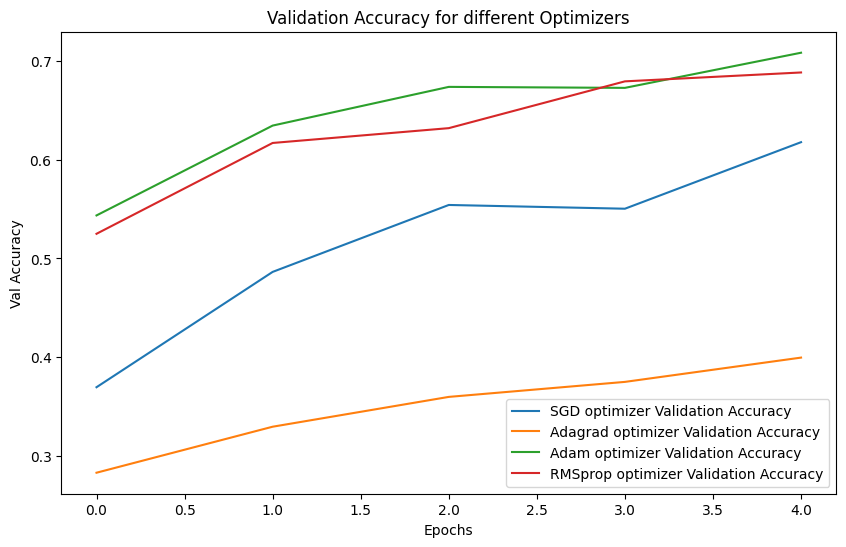

In [8]:
#figure of different optimizers working
plt.figure(figsize=(10, 6))
for opt in optimizers:
    plt.plot(histories[opt].history['val_accuracy'], label=f"{opt} optimizer Validation Accuracy")
plt.title("Validation Accuracy for different Optimizers")
plt.xlabel("Epochs")
plt.ylabel("Val Accuracy")
plt.legend()
plt.show()

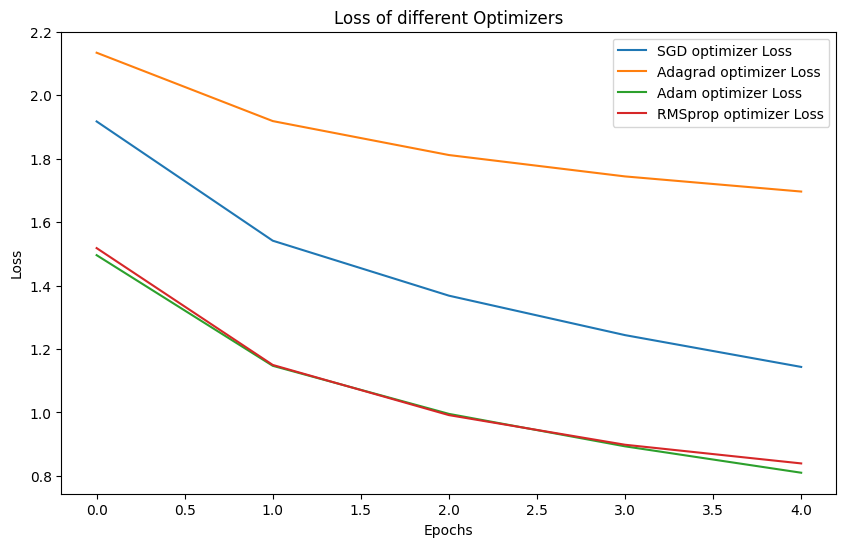

In [9]:
#figure of different loss of optimizers
plt.figure(figsize=(10, 6))
for opt in optimizers:
    plt.plot(histories[opt].history['loss'], label=f"{opt} optimizer Loss")
plt.title("Loss of different Optimizers")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [10]:
#tabulating all
for opt in optimizers:
    val_accuracy = histories[opt].history['val_accuracy'][-1]
    loss = histories[opt].history['loss'][-1]
    print(f"{opt.upper():<8} → Val Accuracy: {val_accuracy:.4f}, Val Loss: {loss:.4f}")

SGD      → Val Accuracy: 0.6178, Val Loss: 1.1435
ADAGRAD  → Val Accuracy: 0.3996, Val Loss: 1.6965
ADAM     → Val Accuracy: 0.7084, Val Loss: 0.8099
RMSPROP  → Val Accuracy: 0.6884, Val Loss: 0.8392
